In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:


def draw_circle (event , x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 20, (150,0,200), -1)

img = np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)
while (1):
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()

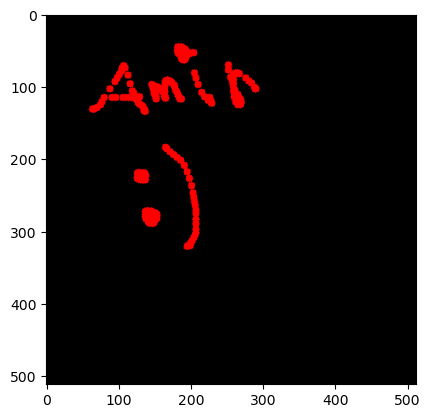

In [ ]:
img = np.zeros((512, 512, 3), np.uint8)
drawing = False

def brush(event ,x,y,flags,param):
    global drawing 
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing :
            cv2.circle(img, (x,y), 5, (0,0,255), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        
        

cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)
while True:
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()
plt.imshow(img[... , ::-1])

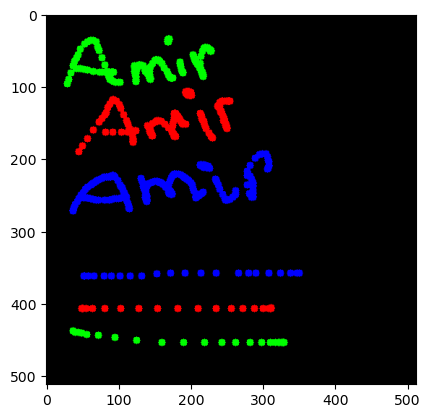

In [ ]:
img = np.zeros((512, 512, 3), np.uint8)
drawing = False
color = (0,255,0)
def brush(event ,x,y,flags,param):
    global drawing ,color
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing :
            cv2.circle(img, (x,y), 5, color, -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        
        

cv2.namedWindow('image')
cv2.setMouseCallback('image', brush)
while True:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF 
    if k == ord('b'):
        color = (255, 0, 0)
    elif k == ord('g'):
        color = (0, 255, 0)
    elif k == ord('r'):
        color = (0, 0, 255) 
    elif k == ord('q'):
        break 
cv2.destroyAllWindows()
plt.imshow(img[... , ::-1])

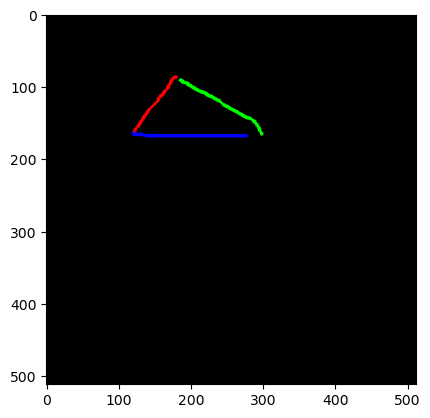

In [9]:
img = np.zeros((512, 512, 3), np.uint8)
drawing = False
color = (0,255,0)
ix = 0
iy = 0
def draw(event ,x,y,flags,param):
    global drawing ,color ,ix ,iy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix = x
        iy = y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing :
            cv2.line(img, pt1=(ix,iy),pt2=(x,y) , color=color , thickness= 3)
            ix=x
            iy=y
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        
        

cv2.namedWindow('image')
cv2.setMouseCallback('image', draw)
while True:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF 
    if k == ord('b'):
        color = (255, 0, 0)
    elif k == ord('g'):
        color = (0, 255, 0)
    elif k == ord('r'):
        color = (0, 0, 255) 
    elif k == ord('q'):
        break 
cv2.destroyAllWindows()
plt.imshow(img[... , ::-1])

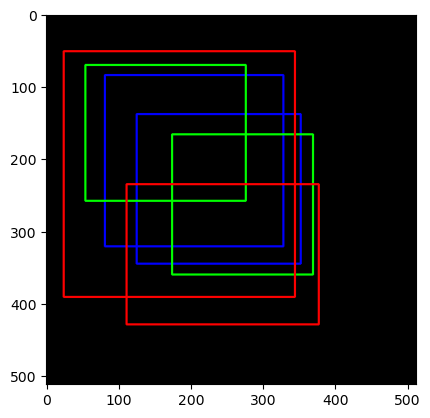

In [14]:
img = np.zeros((512, 512, 3), np.uint8)
clone = np.zeros((512, 512, 3), np.uint8)
drawing = False
start_point =(0,0)
color = (0,255,0)
points=[]
def draw(event ,x,y,flags,param):
    global drawing ,color ,points,start_point

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        start_point=(x,y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        points.append([start_point , (x,y)])
        cv2.rectangle(img , start_point , (x,y),color , 2)

        
        

cv2.namedWindow('image')
cv2.setMouseCallback('image', draw)
while True:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF 
    if k == ord('b'):
        color = (255, 0, 0)
    elif k == ord('g'):
        color = (0, 255, 0)
    elif k == ord('r'):
        color = (0, 0, 255) 
    elif k == ord('t'):
        img=clone.copy()
        points=[]
    elif k == ord('q'):
        break 
cv2.destroyAllWindows()
plt.imshow(img[... , ::-1])

alpha 0.6


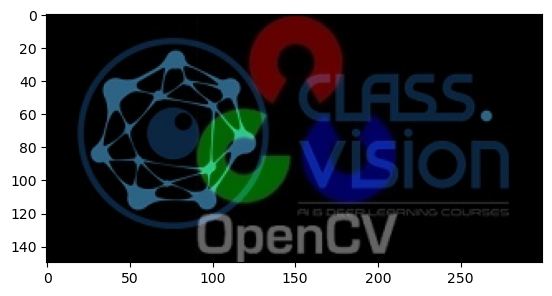

In [ ]:
import matplotlib.pyplot as plt
import cv2

slider_max = 100
src1 = cv2.imread('../data/images/class.vision.jpg')
src2 = cv2.imread('../data/images/opencv.jpg') 
if src1 is None or src2 is None:
    raise ValueError("Error loading one or both images")

cv2.namedWindow('tracker')
def tracker(val):
    global dst, alpha
    alpha = val / slider_max 
    beta = (1.0 - alpha)
    dst = cv2.addWeighted(src1, alpha, src2, beta, 0.0)
    cv2.imshow('tracker', dst)

tracker_name = f'alpha {slider_max}' 
cv2.createTrackbar(tracker_name, 'tracker', 0, slider_max, tracker)
tracker(0)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(dst[...,::-1])
print(f'alpha {alpha}')
